In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
x = pd.read_csv('./Data/intermediate_results/X.csv')

In [29]:
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis = 1)
x = x.drop('gross', axis = 1)


In [30]:
from sklearn.linear_model import Lasso

model = Lasso()

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [32]:
len(x_train)/len(x)

0.7498153164245259

In [33]:
x_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
3089,6000000.0,2008.0,2.35,109.0,1582.0,6000000.0,7.9
3533,2500000.0,2003.0,1.85,99.0,79.0,3200000.0,6.6
3494,3000000.0,2013.0,2.35,85.0,844.0,3000000.0,5.5
2586,12000000.0,2002.0,1.85,93.0,2393.0,12000000.0,5.4
977,45000000.0,1994.0,2.35,111.0,12161.0,45000000.0,6.3


In [34]:
model.fit(x_train, y_train)

Lasso()

In [35]:
model.score(x_test, y_test)

0.5611626528613718

In [36]:
# regression linear params
model.coef_

array([ 3.02364581e+00,  4.50043893e+04, -7.74179054e+06,  7.26156154e+03,
        2.56822793e+02, -3.48792525e-02,  2.67365687e+07])

In [37]:
var = np.floor(np.log10(np.abs(model.coef_)))

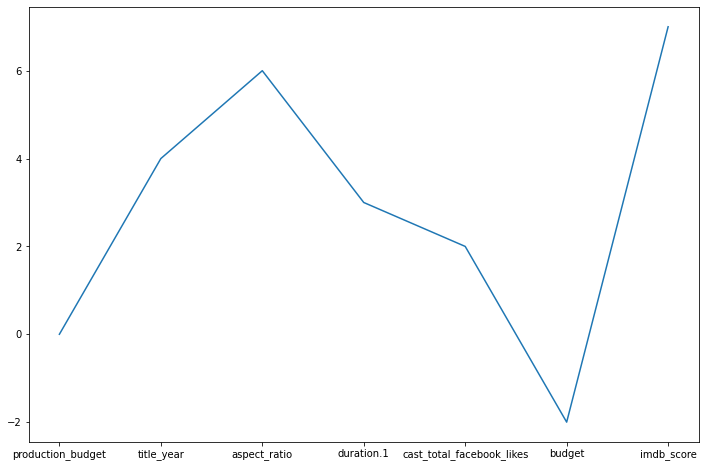

In [38]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7), list(x.columns));

In [39]:
import seaborn as sns

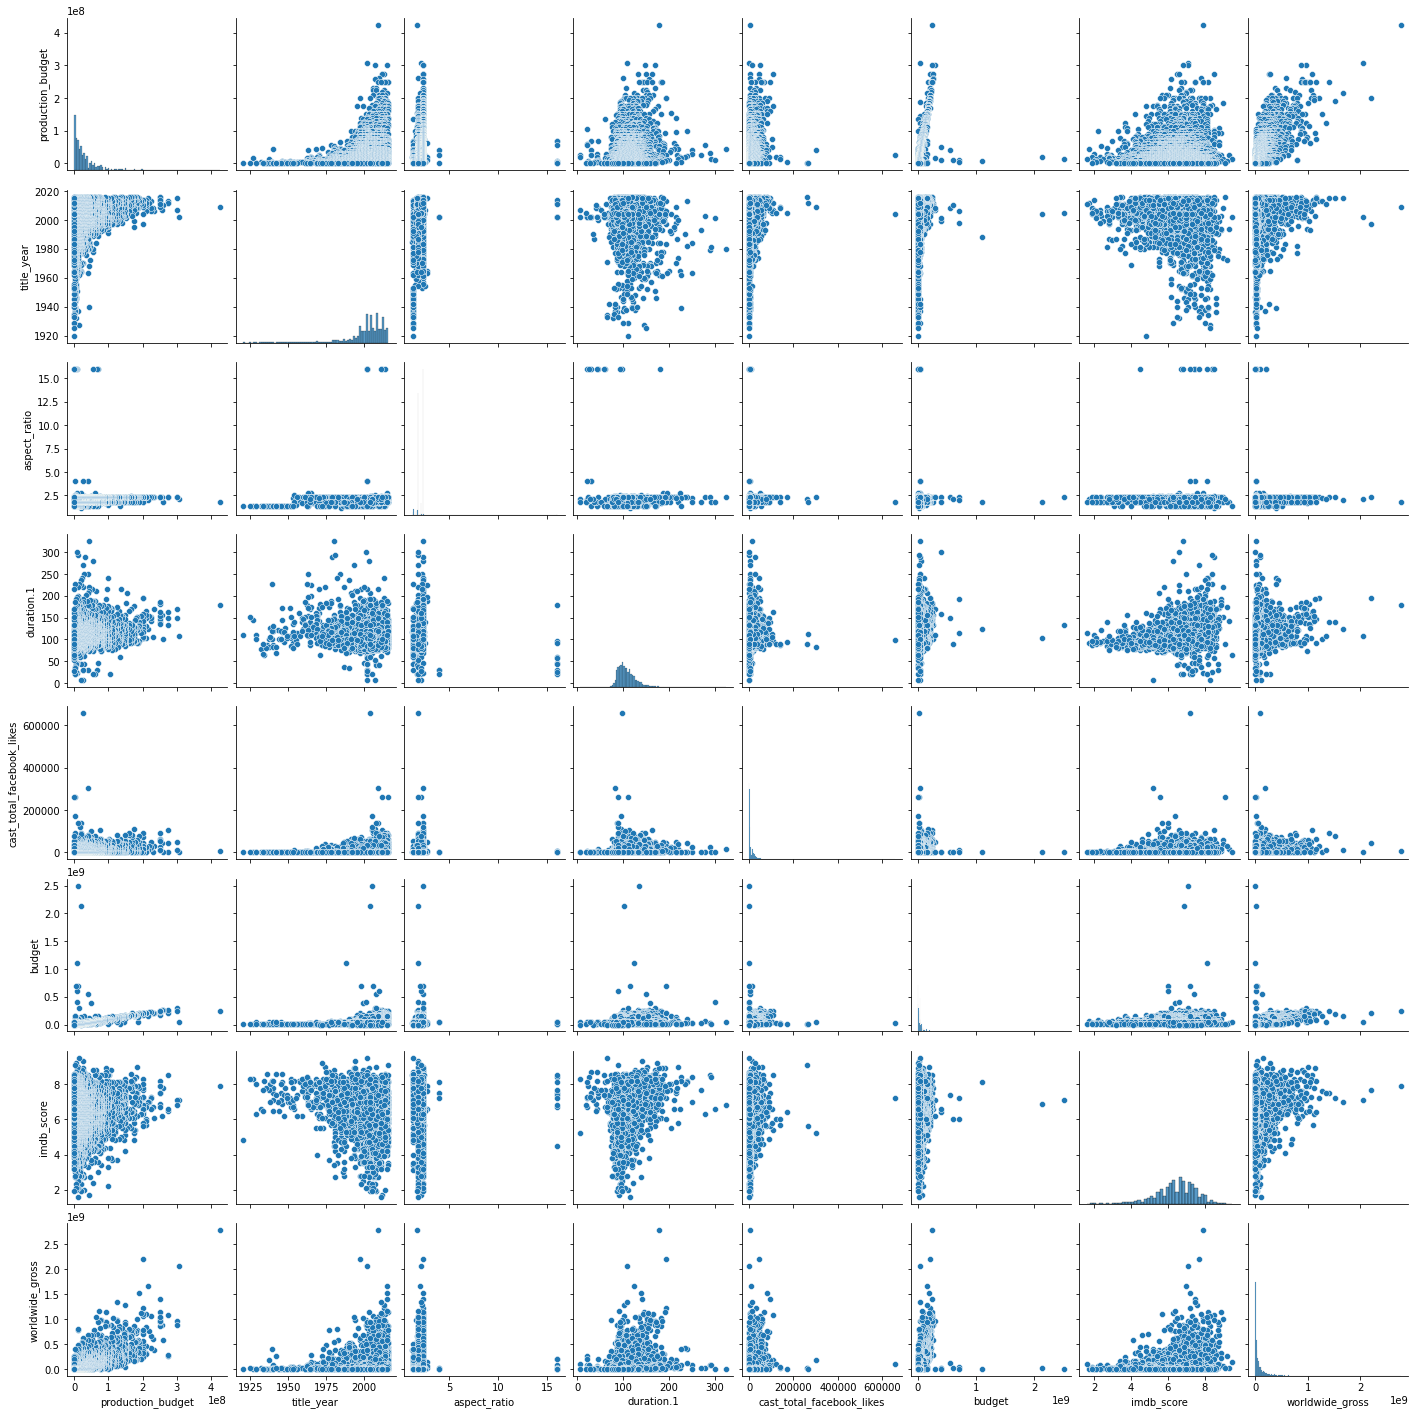

In [51]:
z = pd.concat([x,y], axis = 1)
sns.pairplot(z)

In [59]:
#clase means how expensive the film was
clase = pd.cut(x['production_budget'], 8).cat.codes.rename('class')
Z2 = pd.concat([x,clase], axis = 1)

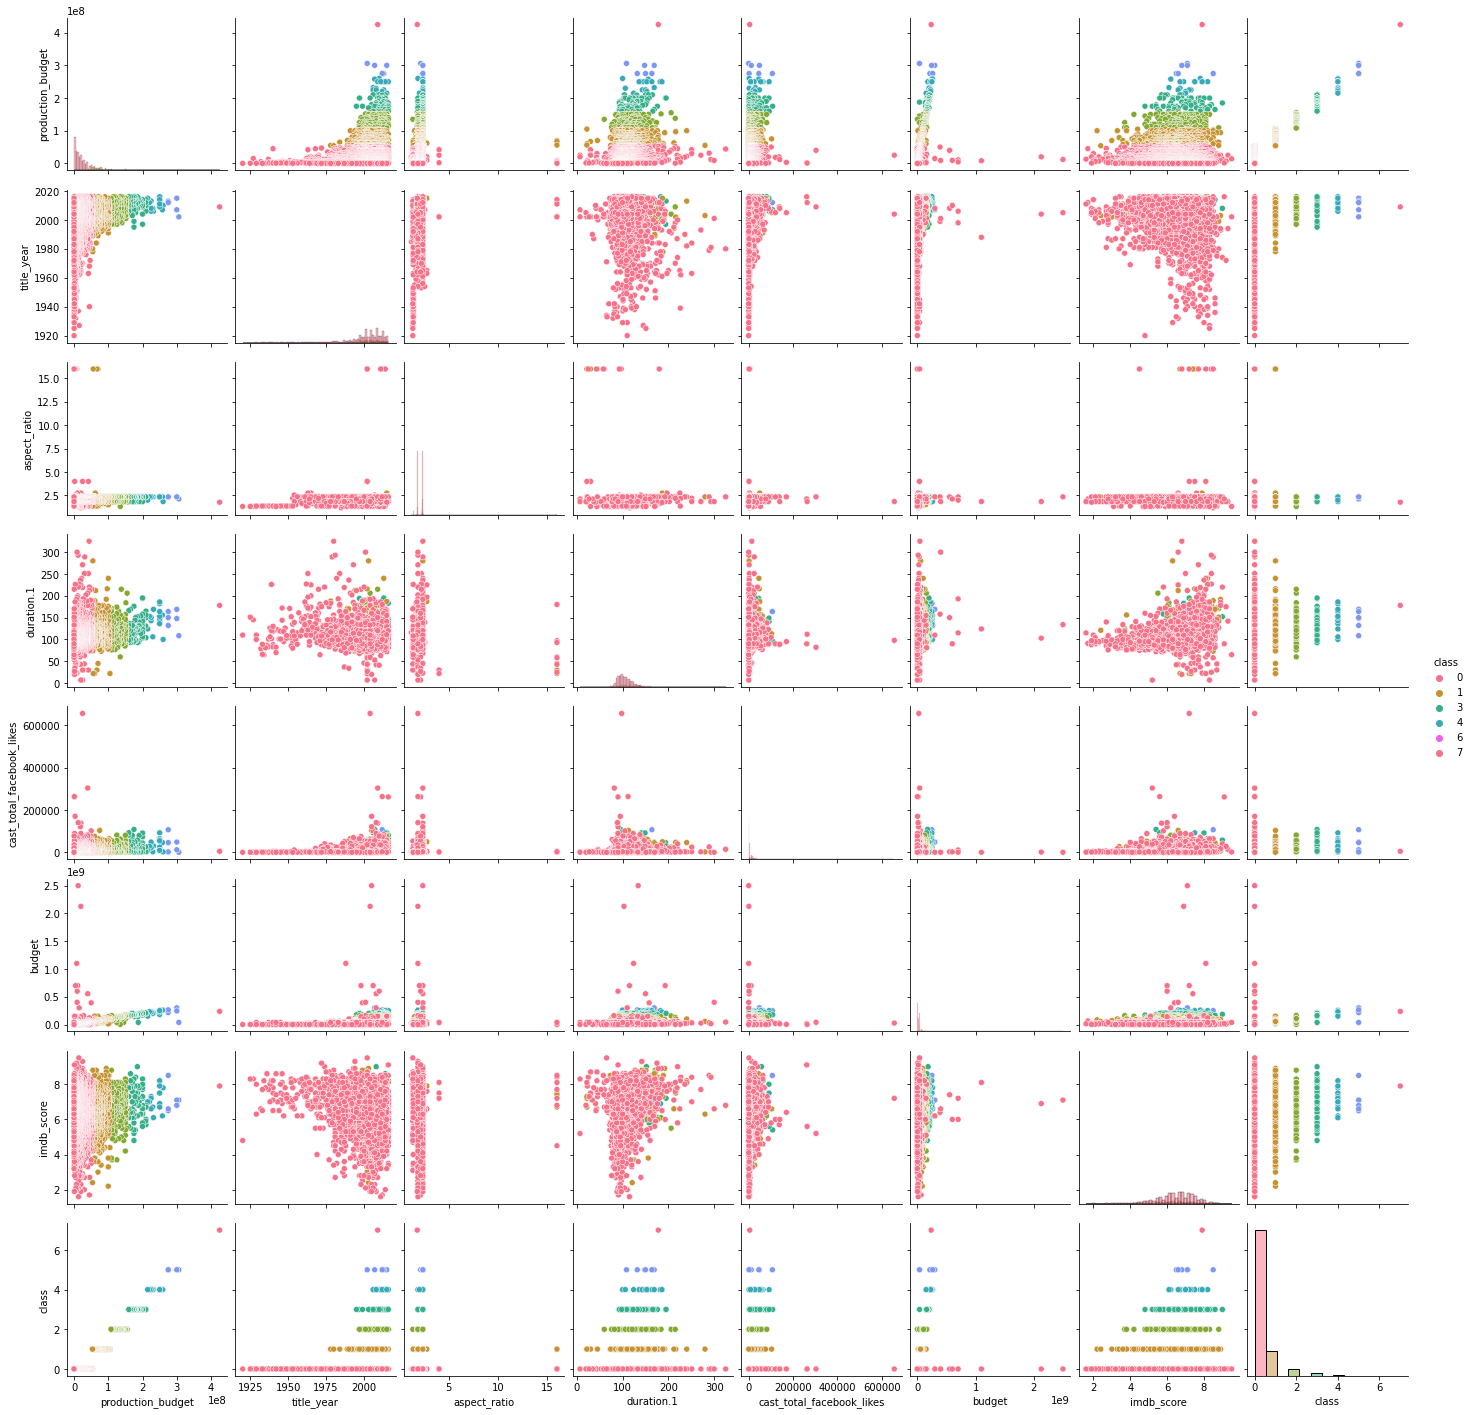

In [62]:
sns.pairplot(Z2, hue = 'class', vars = Z2.columns, diag_kind='hist', palette='husl')

<AxesSubplot:>

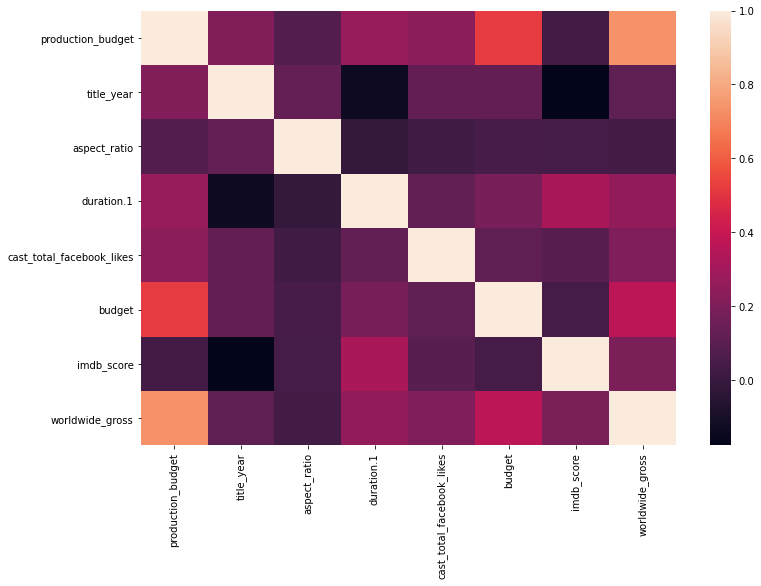

In [63]:
Z3 = pd.concat([x,y], axis = 1)
sns.heatmap(Z3.corr())

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(x,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000020C8EA70040>)

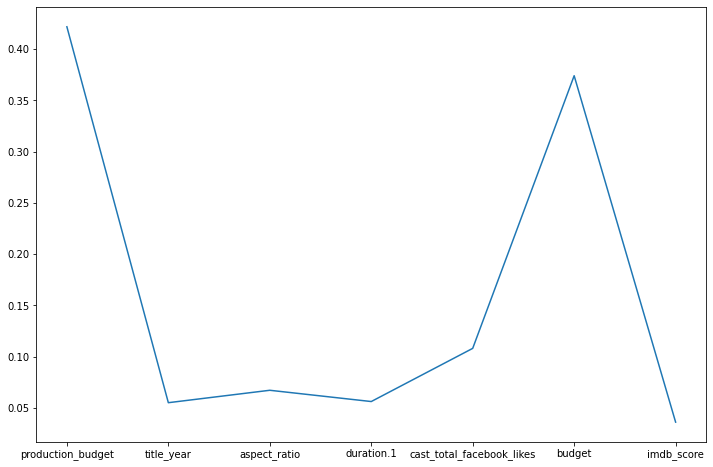

In [66]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7), list(x.columns));

In [69]:
x2 = x[['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']]
x3 = x[['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [71]:
cols2 = ['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']
x2_train, x2_test, y2_train, y2_test = x_train[cols2], x_test[cols2], y_train, y_test

cols3 =['production_budget', 'cast_total_facebook_likes', 'imdb_score']
x3_train, x3_test, y3_train, y3_test = x_train[cols3], x_test[cols3], y_train, y_test

In [73]:
len(x_train)

3045

In [74]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(x_train, y_train)
model2.fit(x2_train, y2_train)
model3.fit(x3_train,y3_train)

d:\CURSOS\14. ML aplicado Python\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2198474551721124e+18, tolerance: 8295929398632868.0
  model = cd_fast.enet_coordinate_descent(
d:\CURSOS\14. ML aplicado Python\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.393498289537497e+18, tolerance: 8295929398632868.0
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [75]:
print(model1.score(x_test, y_test))
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))

0.5533884443593533
0.5531228571266347
0.5531236367362979
